In [1]:
# import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

import requests
import json
from datetime import datetime
from ratelimit import limits, sleep_and_retry

from time import sleep

from random import randint

# set the directory for the data
data_dir = 'Resources'

# set the directory for the output
output_dir = 'Output'

# set api key
load_dotenv()
airnow_api_key = os.getenv("AIR_NOW_API_KEY")

# set the base url for the airnow api
airnow_base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json"


In [2]:
air_quality = pd.DataFrame(columns=['DateObserved', 'HourObserved', 'LocalTimeZone', 'ReportingArea', 'StateCode', 'Latitude', 'Longitude', 'ParameterName', 'AQI', 'CategoryNumber', 'CategoryName'])

In [7]:
CALLS = 8
PERIOD = 60

@sleep_and_retry
@limits(calls=CALLS, period=PERIOD)
def get_air_now_data(zip_code, year, month, day, distance, calls=0):
    # set the parameters for the api call
    random_hour = randint(0, 24)
    date = f"{year}-{month:02d}-{day}T00-{random_hour}00"
    params = {
        'zipCode': zip_code,
        'date': date,
        'distance':distance,
        'API_KEY': airnow_api_key
    }

    response = requests.get(airnow_base_url, params=params)
    if response.status_code != 200:
        if calls < 5:
            calls += 1
            sleep_time = randint(1, 5)
            print(f"Sleeping for {sleep_time} seconds")
            sleep(sleep_time)
            return get_air_now_data(zip_code, year, month, day, distance, calls)
        else:
            print(f"Failed to get data for {zip_code} on {date}")
            return None
    data = response.json()
    return data

In [8]:
# zip_codes = ['10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475']
zip_codes = ['10460']
miles = 35
for zip_code in zip_codes:
    for year in range(2023, 2025):
        for month in range(1, 13):
            for day in range(2):
                d = 1
                if day != 0:
                    d = 15
                response = get_air_now_data(zip_code, year, month, d, miles)
                for item in response:
                    if item['ParameterName'] in ['PM2.5', 'PM10']:
                        print(item)
                        item['CategoryNumber'] = item['Category']['Number']
                        item['CategoryName'] = item['Category']['Name']
                        air_quality = air_quality._append(item, ignore_index=True)

Sleeping for 2 seconds
{'DateObserved': '2023-01-01', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.8419, 'Longitude': -73.8359, 'ParameterName': 'PM2.5', 'AQI': 54, 'Category': {'Number': 2, 'Name': 'Moderate'}}
Sleeping for 3 seconds
Sleeping for 5 seconds
Sleeping for 4 seconds
{'DateObserved': '2023-01-15', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.8419, 'Longitude': -73.8359, 'ParameterName': 'PM2.5', 'AQI': 52, 'Category': {'Number': 2, 'Name': 'Moderate'}}
Sleeping for 4 seconds
{'DateObserved': '2023-02-01', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.8419, 'Longitude': -73.8359, 'ParameterName': 'PM2.5', 'AQI': 53, 'Category': {'Number': 2, 'Name': 'Moderate'}}
Sleeping for 4 seconds
{'DateObserved': '2023-02-15', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'R

TypeError: 'NoneType' object is not iterable

In [10]:
air_quality

,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,CategoryNumber,CategoryName,Category
0,2018-01-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,57,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
1,2018-01-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,55,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
2,2018-02-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,61,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
3,2018-02-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,70,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
4,2018-03-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,58,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
...,...,...,...,...,...,...,...,...,...,...,...,...
148,2024-03-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,39,1,Good,"{'Number': 1, 'Name': 'Good'}"
149,2024-03-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,56,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
150,2024-04-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,54,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
151,2024-04-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,52,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"


In [9]:
air_quality.to_csv(f"{output_dir}/air_quality.csv", index=False)

<Axes: title={'center': 'PM2.5 AQI by Date'}, xlabel='DateObserved', ylabel='PM2.5'>

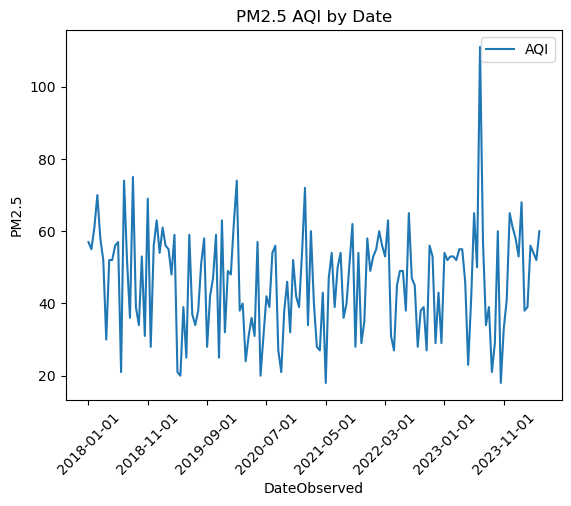

In [15]:
air_quality.plot(x='DateObserved', y='AQI', ylabel='PM2.5', kind='line', rot=45, title='PM2.5 AQI by Date')

In [16]:
ny_vehicle_regestrations_file = 'Vehicle__Snowmobile__and_Boat_Registrations.csv'
ny_vehcile_regestrations_df = pd.read_csv(os.path.join(data_dir, ny_vehicle_regestrations_file))
ny_vehcile_regestrations_df.head()

C:\Users\Tim\AppData\Local\Temp\ipykernel_16944\2519677265.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  ny_vehcile_regestrations_df = pd.read_csv(os.path.join(data_dir, ny_vehicle_regestrations_file))


,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,925,PSD,NEW YORK CITY,NY,10007,NEW YORK,1972.0,INTER,SN/P,GAS,4009.0,NaN,NaN,12/01/1972,NaN,YW,N,N,N
1,VEH,4H302459,PSD,SYRACUSE,NY,13202,ONONDAGA,1961.0,BUICK,4DSD,GAS,4129.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
2,VEH,3B31H138446,PSD,SINCLAIRVILLE,NY,0,CHAUTAUQUA,1973.0,FORD,4DSD,GAS,3693.0,NaN,NaN,12/01/1972,NaN,GL,N,N,N
3,VEH,2D29M3G108024,PSD,HENRIETTA,NY,14467,MONROE,1973.0,PONTI,4DSD,GAS,4014.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
4,VEH,12861,PSD,LEXINGTON,NY,12452,GREENE,1972.0,OSHKO,SN/P,DIESEL,42000.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N


In [20]:
ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])


In [21]:
ny_vehcile_regestrations_df['Reg Expiration Date'] = ny_vehcile_regestrations_df['Reg Expiration Date'].fillna(ny_vehcile_regestrations_df['Reg Valid Date'] + pd.DateOffset(years=2) - pd.DateOffset(days=1))

In [22]:
ny_car_df = ny_vehcile_regestrations_df[ny_vehcile_regestrations_df['Record Type'] == 'VEH']
ny_car_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,925,PSD,NEW YORK CITY,NY,10007,NEW YORK,1972.0,INTER,SN/P,GAS,4009.0,NaN,NaN,1972-12-01,1974-11-30,YW,N,N,N
1,VEH,4H302459,PSD,SYRACUSE,NY,13202,ONONDAGA,1961.0,BUICK,4DSD,GAS,4129.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N
2,VEH,3B31H138446,PSD,SINCLAIRVILLE,NY,0,CHAUTAUQUA,1973.0,FORD,4DSD,GAS,3693.0,NaN,NaN,1972-12-01,1974-11-30,GL,N,N,N
3,VEH,2D29M3G108024,PSD,HENRIETTA,NY,14467,MONROE,1973.0,PONTI,4DSD,GAS,4014.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N
4,VEH,12861,PSD,LEXINGTON,NY,12452,GREENE,1972.0,OSHKO,SN/P,DIESEL,42000.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N


In [23]:
brooklyn_cars = ny_car_df.loc[ny_car_df['City'] == 'BROOKLYN']

In [24]:
brooklyn_cars = brooklyn_cars.dropna(subset=['VIN'])

brooklyn_vin_group = brooklyn_cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

brooklyn_vin_group['Reg Valid Date'] = pd.to_datetime(brooklyn_vin_group['Reg Valid Date'])
brooklyn_vin_group['Reg Expiration Date'] = pd.to_datetime(brooklyn_vin_group['Reg Expiration Date'])

start_year = 2018
end_year = 2021

brooklyn_vin_group = brooklyn_vin_group[
    (brooklyn_vin_group['Reg Valid Date'].dt.year <= end_year)
    & (brooklyn_vin_group['Reg Expiration Date'].dt.year >= start_year) 
]

brooklyn_vin_group['Fuel Type'].value_counts()
# brooklyn_vin_group

Fuel Type
GAS         670
DIESEL      387
ELECTRIC     82
NONE         63
COMP N/G      4
FLEX          2
Name: count, dtype: int64

In [45]:
brooklyn_vin_group = brooklyn_vin_group.reset_index()
brooklyn_vin_group

,VIN,Reg Valid Date,Reg Expiration Date,Fuel Type
0,010301Q5624,2017-12-18,2019-12-17,DIESEL
1,10HHBC103G2000012,2016-01-14,2018-01-13,NONE
2,10HHS1003C1000002,2016-04-13,2018-04-12,NONE
3,10HHS1003G2000002,2016-01-14,2018-01-13,NONE
4,10HHS1007G2000004,2016-03-29,2018-03-28,NONE
...,...,...,...,...
1203,WDYPF3CD8KP051032,2020-03-03,2022-03-02,GAS
1204,WDYPF3CD9KP055915,2020-03-03,2022-03-02,GAS
1205,WDYPF3CD9KP055963,2020-03-03,2022-03-02,GAS
1206,WDYPF3DC0GP276946,2017-02-15,2019-02-14,DIESEL


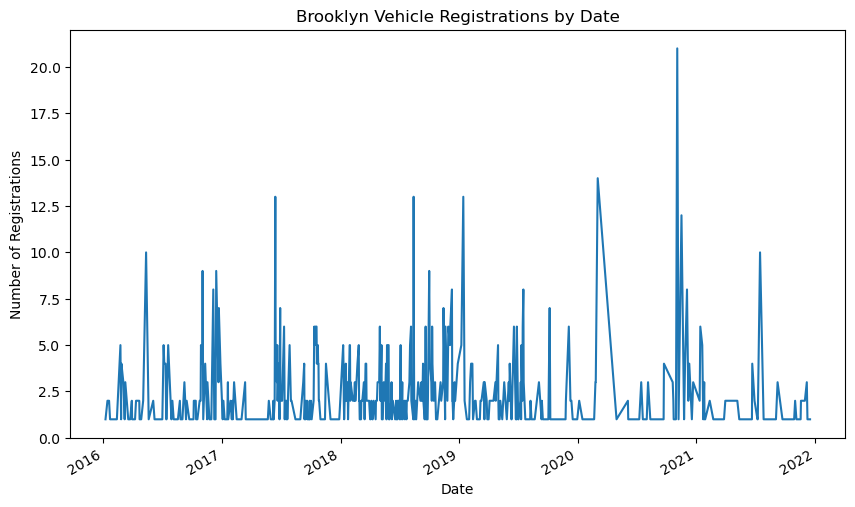

In [26]:
brooklyn_vin_group['Reg Valid Date'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Brooklyn Vehicle Registrations by Date')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.show()

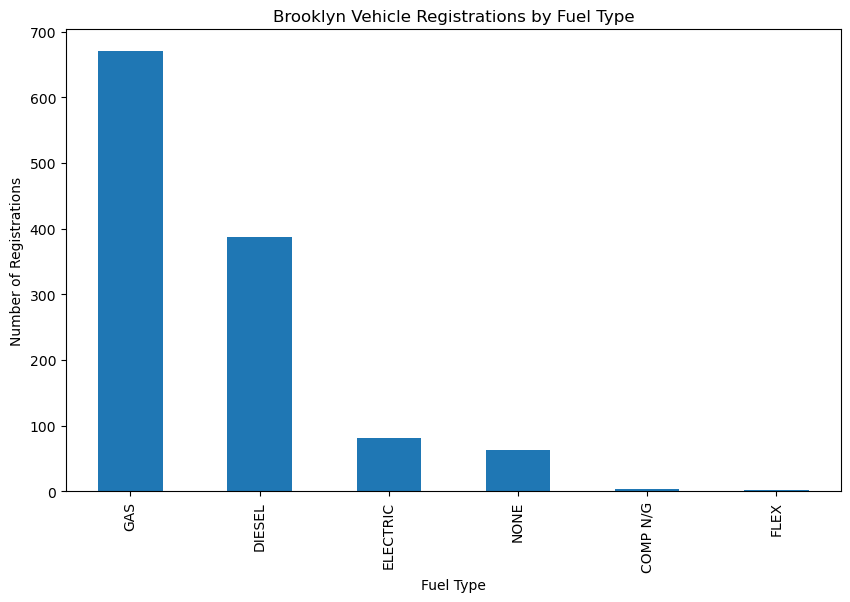

In [27]:
brooklyn_vin_group['Fuel Type'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Brooklyn Vehicle Registrations by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Registrations')

plt.show()


<Axes: xlabel='Reg Valid Date'>

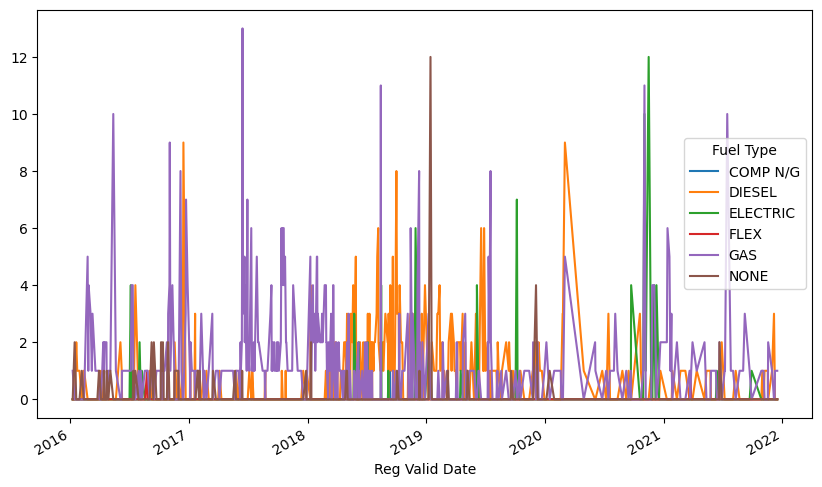

In [30]:
fuel_type_by_date = brooklyn_vin_group.groupby(['Reg Valid Date', 'Fuel Type']).size().unstack().fillna(0)

fuel_type_by_date.plot(kind='line', figsize=(10, 6))

<Axes: xlabel='Reg Valid Date'>

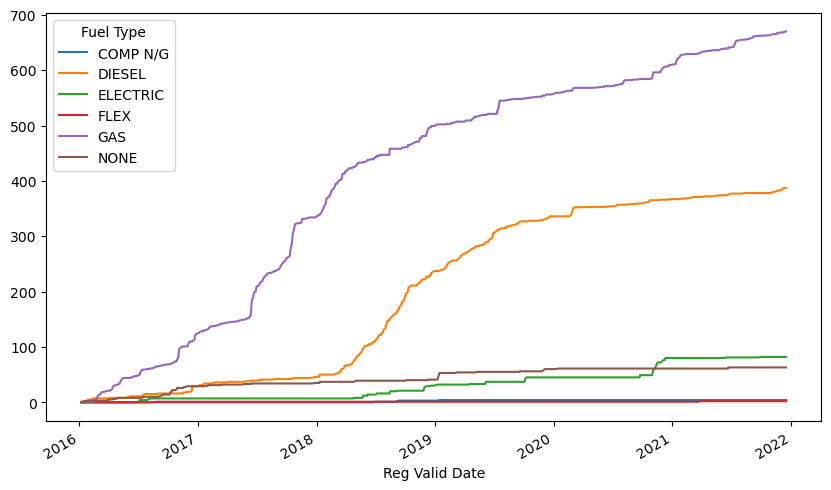

In [35]:
fuel_type_by_date.cumsum().plot(kind='line', figsize=(10, 6), label='Vechicle Registrations by Fuel Type')

<Axes: >

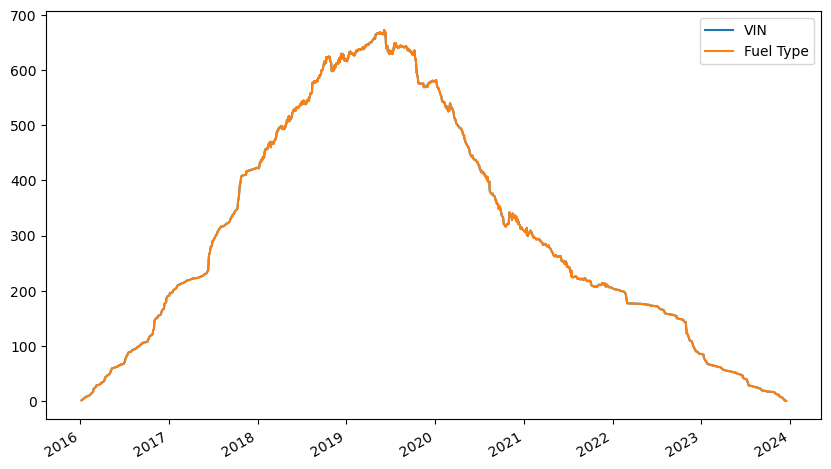

In [50]:
start_dates = brooklyn_vin_group.groupby(['Reg Valid Date'])[['VIN', 'Fuel Type']].count()
end_dates = -brooklyn_vin_group.groupby(['Reg Expiration Date'])[['VIN', 'Fuel Type']].count()
combined = pd.concat([start_dates, end_dates]).sort_index().cumsum()
combined.plot(kind='line', figsize=(10, 6), label='Active Registrations Over Time')

In [54]:
start_dates = brooklyn_vin_group.groupby(['Reg Valid Date', 'Fuel Type']).VIN.count().reset_index(name='count')
start_dates['count'] = 1

end_dates = brooklyn_vin_group.groupby(['Reg Expiration Date', 'Fuel Type']).VIN.count().reset_index(name='count')
end_dates['count'] = -1

In [55]:
combined = pd.concat([start_dates.rename(columns={'Reg Valid Date':'Date'}), end_dates.rename(columns={'Reg Expiration Date':'Date'})])
combined = combined.sort_values(by=['Fuel Type', 'Date'])
combined['cumulative_count'] = combined.groupby('Fuel Type')['count'].cumsum()

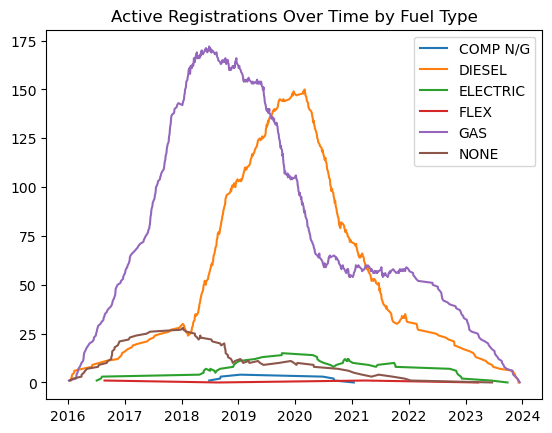

In [57]:
import matplotlib.pyplot as plt

for fuel_type in combined['Fuel Type'].unique():
    subset = combined[combined['Fuel Type'] == fuel_type]
    plt.plot(subset['Date'], subset['cumulative_count'], label=fuel_type)

plt.title('Active Registrations Over Time by Fuel Type (BRONX)')
plt.legend()
plt.show()

In [59]:
# get manhattan data
manhattan_cars = ny_car_df.loc[ny_car_df['City'] == 'NEW YORK']

manhattan_cars = manhattan_cars.dropna(subset=['VIN'])

manhattan_vin_group = manhattan_cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

manhattan_vin_group['Reg Valid Date'] = pd.to_datetime(manhattan_vin_group['Reg Valid Date'])
manhattan_vin_group['Reg Expiration Date'] = pd.to_datetime(manhattan_vin_group['Reg Expiration Date'])

manhattan_vin_group['Reg Expiration Date'] = manhattan_vin_group['Reg Expiration Date'].fillna(manhattan_vin_group['Reg Valid Date'] + pd.DateOffset(years=2) - pd.DateOffset(days=1))

start_year = 2018
end_year = 2021

manhattan_vin_group = manhattan_vin_group[
    (manhattan_vin_group['Reg Valid Date'].dt.year <= end_year)
    & (manhattan_vin_group['Reg Expiration Date'].dt.year >= start_year) 
]

manhattan_vin_group['Fuel Type'].value_counts()


Fuel Type
GAS         2037
DIESEL       391
ELECTRIC     139
NONE         101
COMP N/G       6
OTHER          2
FLEX           1
Name: count, dtype: int64

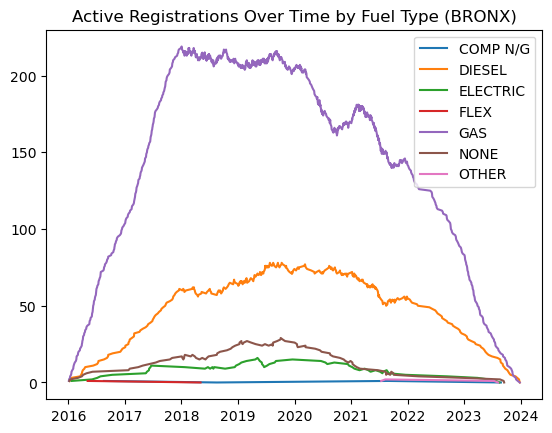

In [61]:
manhattan_vin_group.reset_index(inplace=True)

start_dates = manhattan_vin_group.groupby(['Reg Valid Date', 'Fuel Type']).VIN.count().reset_index(name='count')
start_dates['count'] = 1

end_dates = manhattan_vin_group.groupby(['Reg Expiration Date', 'Fuel Type']).VIN.count().reset_index(name='count')
end_dates['count'] = -1

combined = pd.concat([start_dates.rename(columns={'Reg Valid Date':'Date'}), end_dates.rename(columns={'Reg Expiration Date':'Date'})])
combined = combined.sort_values(by=['Fuel Type', 'Date'])
combined['cumulative_count'] = combined.groupby('Fuel Type')['count'].cumsum()

for fuel_type in combined['Fuel Type'].unique():
    subset = combined[combined['Fuel Type'] == fuel_type]
    plt.plot(subset['Date'], subset['cumulative_count'], label=fuel_type)

plt.title('Active Registrations Over Time by Fuel Type (BRONX)')
plt.legend()
plt.show()

<Axes: xlabel='Reg Valid Date'>

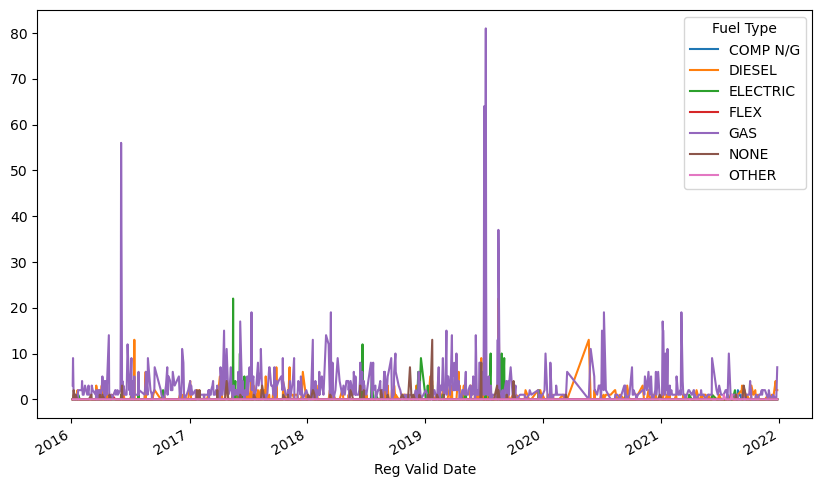

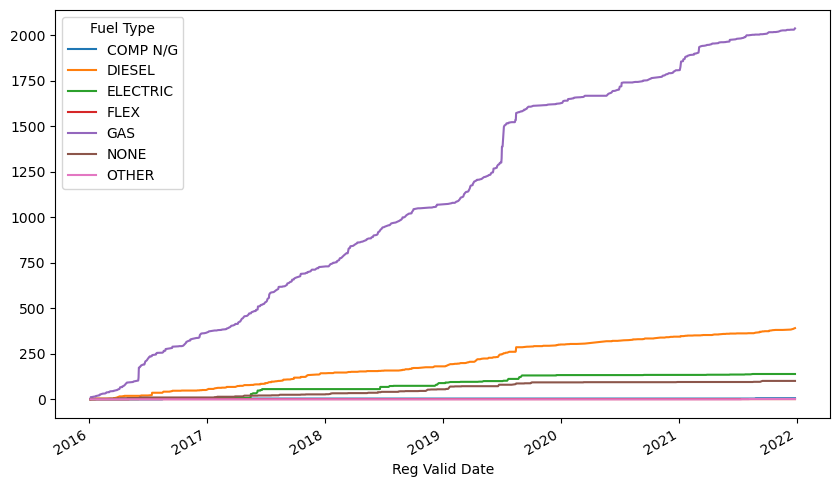

In [66]:
fuel_type_by_date = manhattan_vin_group.groupby(['Reg Valid Date', 'Fuel Type']).size().unstack().fillna(0)
fuel_type_by_date.plot(kind='line', figsize=(10, 6))
fuel_type_by_date.cumsum().plot(kind='line', figsize=(10, 6), label='Vechicle Registrations by Fuel Type')

In [68]:
walkability_file = 'EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'
walkability_df = pd.read_csv(os.path.join(data_dir, walkability_file))
walkability_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [86]:
ny_walkability = walkability_df.dropna(subset=['CSA_Name'])

In [89]:
ny_walkability = ny_walkability[ny_walkability['CSA_Name'].str.contains('New York')]

In [93]:
ny_walkability['CSA_Name'].unique()

array(['New York-Newark, NY-NJ-CT-PA'], dtype=object)

In [94]:
ny_walkability

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
58184,58185,9.009176e+10,9.009176e+10,9,9,175600,4,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,...,-99999.000000,-99999.000000,-99999.000000,9,2,7,1,4.500000,8236.865601,1.624616e+06
58192,58193,9.009176e+10,9.009176e+10,9,9,175600,5,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,...,-99999.000000,-99999.000000,-99999.000000,2,5,6,1,3.500000,8777.035548,2.416333e+06
58193,58194,9.009176e+10,9.009176e+10,9,9,175900,4,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,...,0.052302,0.000535,0.065030,5,9,11,18,12.000000,4825.037612,9.830159e+05
58194,58195,9.009176e+10,9.009176e+10,9,9,176000,2,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,...,-99999.000000,-99999.000000,-99999.000000,4,8,6,1,4.333333,10455.970620,4.455149e+06
58205,58206,9.009184e+10,9.009184e+10,9,9,184100,1,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,...,0.291252,0.001813,0.220446,18,18,11,15,14.666667,5421.180302,7.689398e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194773,194774,4.208930e+11,4.208930e+11,42,89,301001,2,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,...,-99999.000000,-99999.000000,-99999.000000,19,12,7,1,7.833333,13774.401490,8.190772e+06
194774,194775,4.208930e+11,4.208930e+11,42,89,300501,2,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,...,-99999.000000,-99999.000000,-99999.000000,17,17,6,1,8.000000,27009.280830,2.305892e+07
195129,195130,4.208930e+11,4.208930e+11,42,89,300800,1,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,...,0.953047,0.079509,0.945733,20,17,15,19,17.500000,3637.921836,5.419934e+05
195130,195131,4.208930e+11,4.208930e+11,42,89,301302,1,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,...,-99999.000000,-99999.000000,-99999.000000,8,11,4,1,4.833333,33811.517380,3.253632e+07


In [95]:
fips_file = 'fips2county.tsv'

fips = pd.read_csv(os.path.join(data_dir, fips_file), sep='\t')

fips.head()

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,CountyCBSA
0,1,1,Autauga,Alabama,1001,AL,AL | AUTAUGA,33860.0
1,1,3,Baldwin,Alabama,1003,AL,AL | BALDWIN,19300.0
2,1,5,Barbour,Alabama,1005,AL,AL | BARBOUR,21640.0
3,1,7,Bibb,Alabama,1007,AL,AL | BIBB,13820.0
4,1,9,Blount,Alabama,1009,AL,AL | BLOUNT,13820.0


In [101]:
Bronx_fips = fips[(fips['CountyName'].str.contains('Bronx')) & (fips['StateName'].str.contains('New York'))]

Bronx_fips

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,CountyCBSA
1831,36,5,Bronx,New York,36005,NY,NY | BRONX,35620.0


In [99]:
bronx_walkindex = ny_walkability[(
    ny_walkability['STATEFP'] == Bronx_fips['StateFIPS'].values[0]) 
    & (ny_walkability['COUNTYFP'] == Bronx_fips['CountyFIPS_3'].values[0])
]

In [103]:
display(bronx_walkindex.columns)

Index(['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=117)

In [114]:
display(bronx_walkindex[['NatWalkInd', 'D3B_Ranked', 'D4A_Ranked', 'D2B_Ranked']].mean())

NatWalkInd    12.908001
D3B_Ranked    12.811092
D4A_Ranked    18.331023
D2B_Ranked     7.720971
dtype: float64

In [117]:
boston_fips = fips[(fips['CountyName'].str.contains('Suffolk')) & (fips['StateName'].str.contains('Massachusetts'))]

boston_walkindex = walkability_df[(walkability_df['STATEFP'] == boston_fips['StateFIPS'].values[0]) & (walkability_df['COUNTYFP'] == boston_fips['CountyFIPS_3'].values[0])]

In [118]:
boston_walkindex[['NatWalkInd', 'D3B_Ranked', 'D4A_Ranked', 'D2B_Ranked']].mean()

NatWalkInd    14.936791
D3B_Ranked    17.368421
D4A_Ranked    18.026316
D2B_Ranked     9.495356
dtype: float64

In [119]:
cambridge_fips = fips[(fips['CountyName'].str.contains('Middlesex')) & (fips['StateName'].str.contains('Massachusetts'))]
cambridge_walkindex = walkability_df[(walkability_df['STATEFP'] == cambridge_fips['StateFIPS'].values[0]) & (walkability_df['COUNTYFP'] == cambridge_fips['CountyFIPS_3'].values[0])]
cambridge_walkindex[['NatWalkInd', 'D3B_Ranked', 'D4A_Ranked', 'D2B_Ranked']].mean()

NatWalkInd    12.458517
D3B_Ranked    13.644307
D4A_Ranked    12.661959
D2B_Ranked    11.571050
dtype: float64